In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd

filename = "World Largest Cities by Population 2024.csv"
df = pd.read_csv(filename)
df.head()

/Users/hasanenesguray/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,Unnamed: 0,City,Country,Population (2024),Population (2023),Growth Rate
0,0,Tokyo,Japan,37115035,37194105,-0.0021
1,1,Delhi,India,33807403,32941309,0.0263
2,2,Shanghai,China,29867918,29210808,0.0225
3,3,Dhaka,Bangladesh,23935652,23209616,0.0313
4,4,Sao Paulo,Brazil,22806704,22619736,0.0083


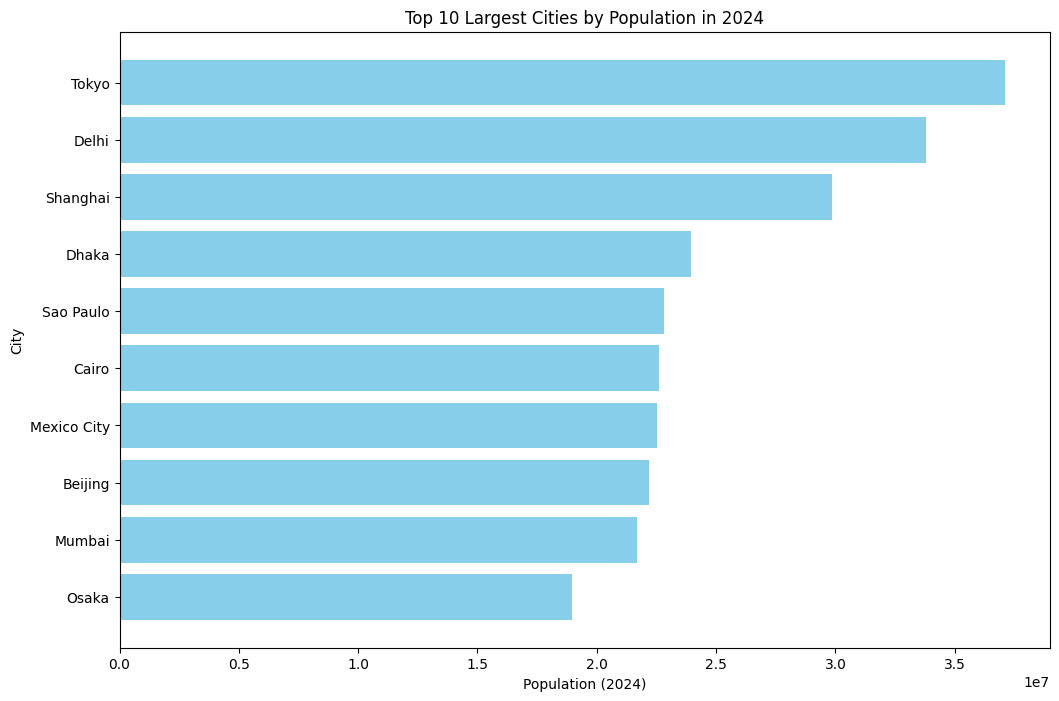

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

top_10_cities = df.sort_values(by='Population (2024)', ascending=False).head(10)

plt.figure(figsize=(12, 8))
plt.barh(top_10_cities['City'], top_10_cities['Population (2024)'], color='skyblue')
plt.xlabel('Population (2024)')
plt.ylabel('City')
plt.title('Top 10 Largest Cities by Population in 2024')
plt.gca().invert_yaxis() 
plt.show()

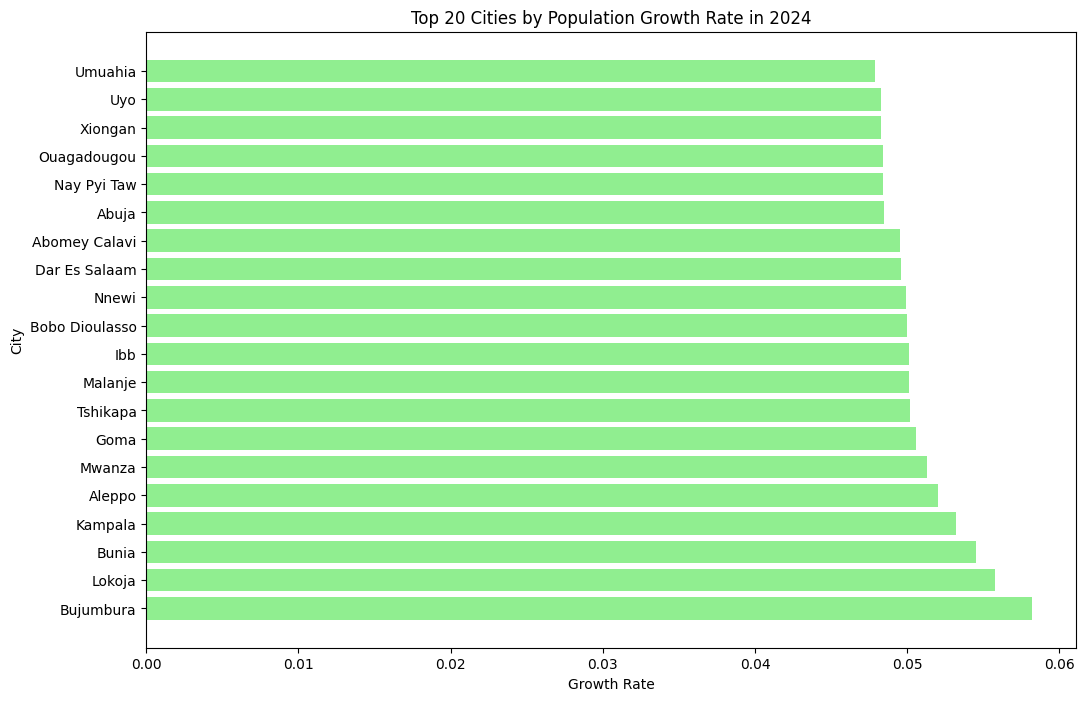

In [3]:
top_20_growth = df.sort_values(by='Growth Rate', ascending=False).head(20)

plt.figure(figsize=(12, 8))
plt.barh(top_20_growth['City'], top_20_growth['Growth Rate'], color='lightgreen')
plt.xlabel('Growth Rate')
plt.ylabel('City')
plt.title('Top 20 Cities by Population Growth Rate in 2024')
plt.show()

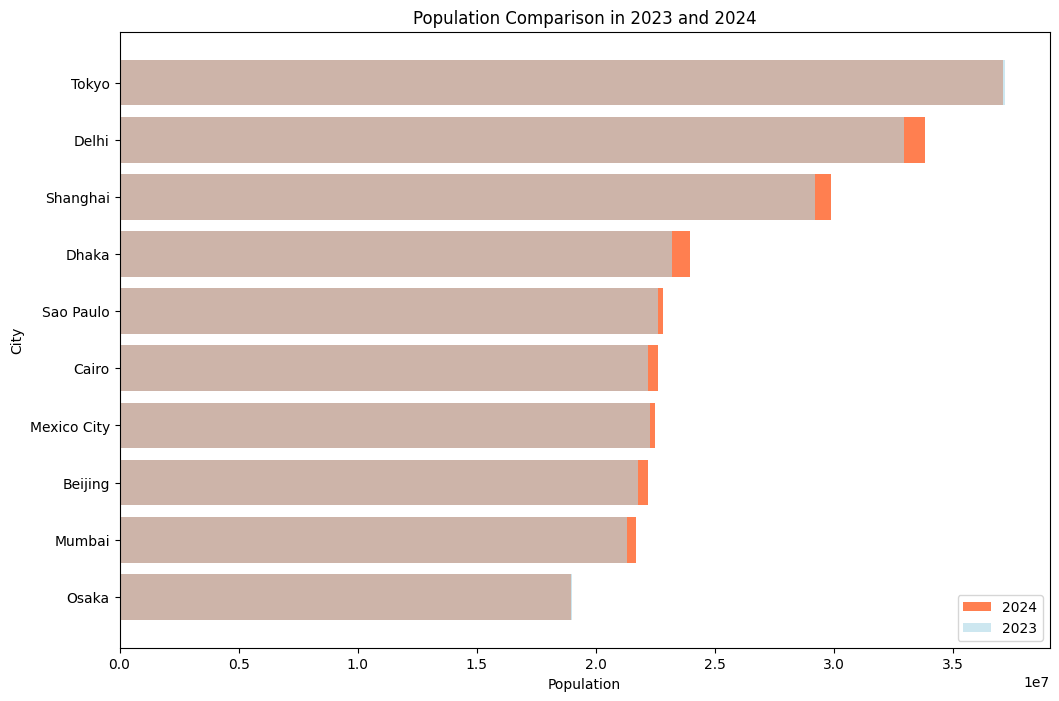

In [4]:
top_10_cities = df.sort_values(by='Population (2024)', ascending=False).head(10)

plt.figure(figsize=(12, 8))
plt.barh(top_10_cities['City'], top_10_cities['Population (2024)'], color='coral', label='2024')
plt.barh(top_10_cities['City'], top_10_cities['Population (2023)'], color='lightblue', alpha=0.6, label='2023')
plt.xlabel('Population')
plt.ylabel('City')
plt.title('Population Comparison in 2023 and 2024')
plt.legend()
plt.gca().invert_yaxis()
plt.show()

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_16403/1047616991.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Population (2024)', y='Country', data=top_20_countries, palette='viridis')


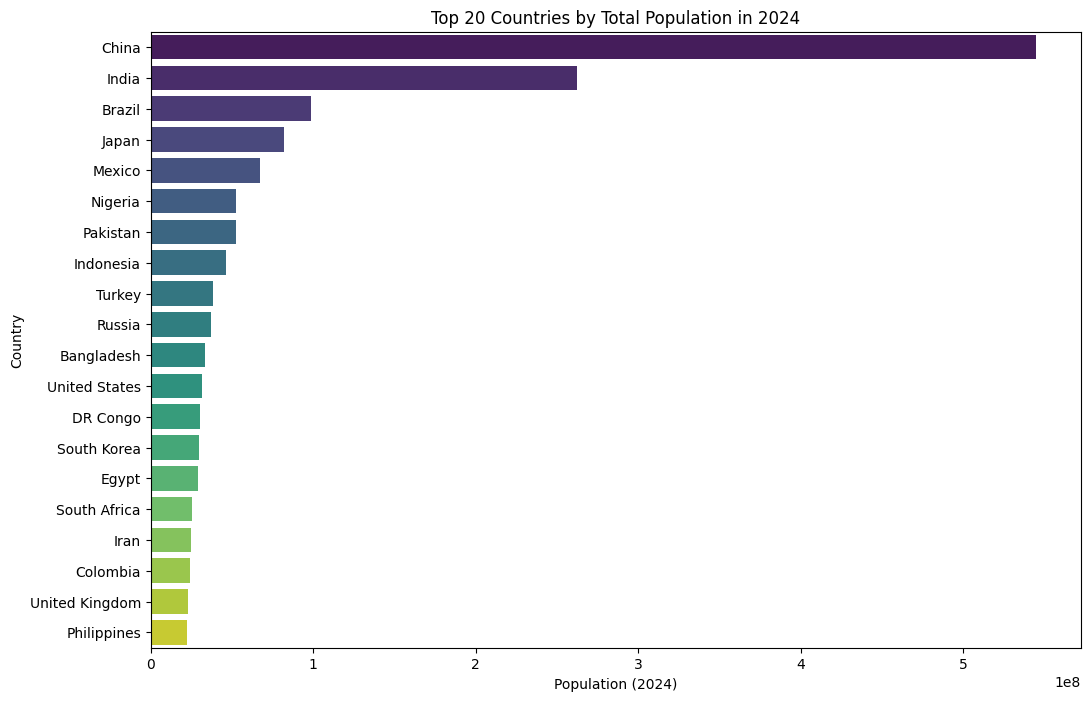

In [5]:
top_20_countries = df.groupby('Country')['Population (2024)'].sum().reset_index().sort_values(by='Population (2024)', ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x='Population (2024)', y='Country', data=top_20_countries, palette='viridis')
plt.xlabel('Population (2024)')
plt.ylabel('Country')
plt.title('Top 20 Countries by Total Population in 2024')
plt.show()

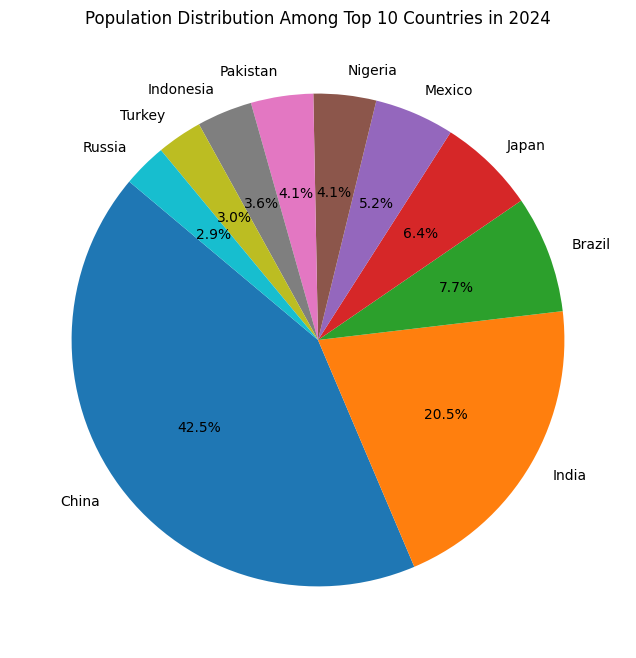

In [6]:
top_10_countries = df.groupby('Country')['Population (2024)'].sum().reset_index().sort_values(by='Population (2024)', ascending=False).head(10)


plt.figure(figsize=(10, 8))
plt.pie(top_10_countries['Population (2024)'], labels=top_10_countries['Country'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('tab10'))
plt.title('Population Distribution Among Top 10 Countries in 2024')
plt.show()

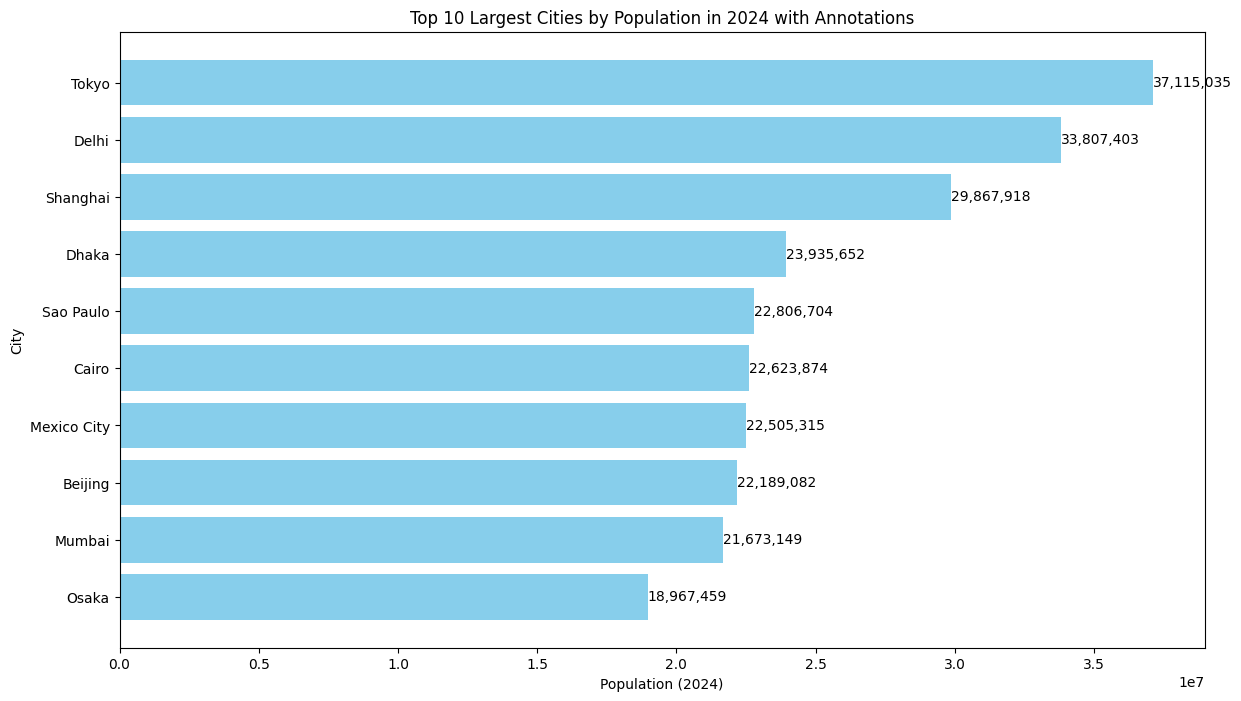

In [7]:
top_10_cities = df.sort_values(by='Population (2024)', ascending=False).head(10)

plt.figure(figsize=(14, 8))
bars = plt.barh(top_10_cities['City'], top_10_cities['Population (2024)'], color='skyblue')

for bar in bars:
    plt.gca().text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{int(bar.get_width()):,}', 
                   ha='left', va='center', fontsize=10, color='black')

plt.xlabel('Population (2024)')
plt.ylabel('City')
plt.title('Top 10 Largest Cities by Population in 2024 with Annotations')
plt.gca().invert_yaxis()
plt.show()

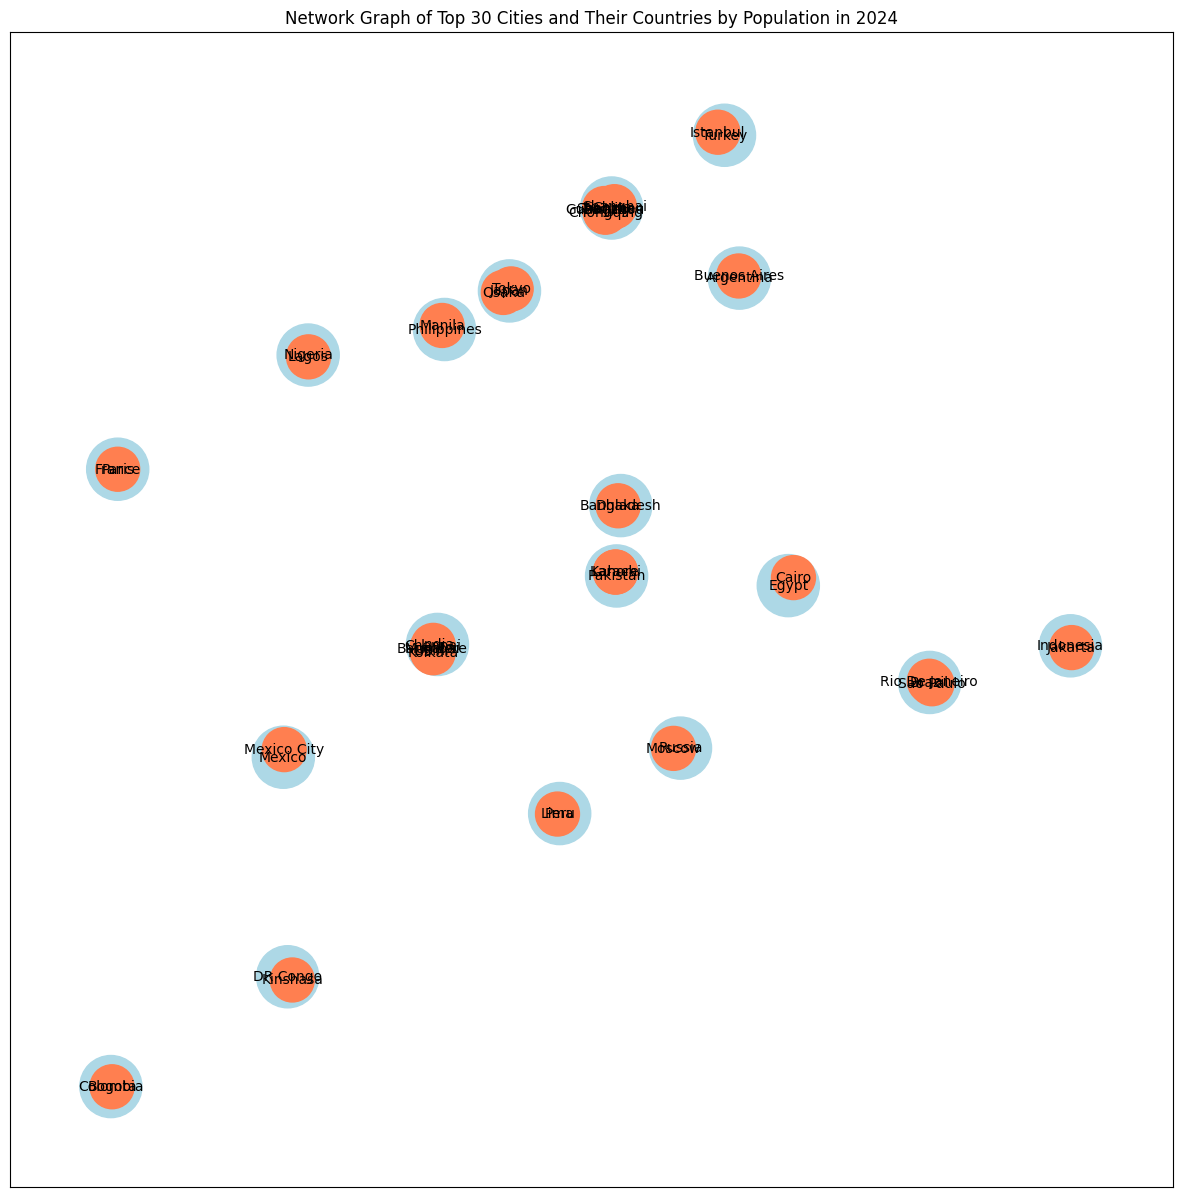

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming df is already defined and has the necessary columns
top_30_cities = df.sort_values(by='Population (2024)', ascending=False).head(30)
G = nx.Graph()

for _, row in top_30_cities.iterrows():
    G.add_node(row['Country'], size=20, color='lightblue')
    G.add_node(row['City'], size=10, color='coral')
    G.add_edge(row['Country'], row['City'], weight=row['Population (2024)'])

pos = nx.spring_layout(G, k=0.1, iterations=50)
sizes = [G.nodes[node]['size'] * 100 for node in G.nodes()]
colors = [G.nodes[node]['color'] for node in G.nodes()]

plt.figure(figsize=(15, 15))
nx.draw_networkx(G, pos, node_size=sizes, node_color=colors, with_labels=True, font_size=10, font_color='black', edge_color='gray')
plt.title('Network Graph of Top 30 Cities and Their Countries by Population in 2024')
plt.show()


/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_16403/2387426426.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot([start_pos, end_pos], [0, 0], 'ro-', lw=2, markersize=6, color='skyblue')


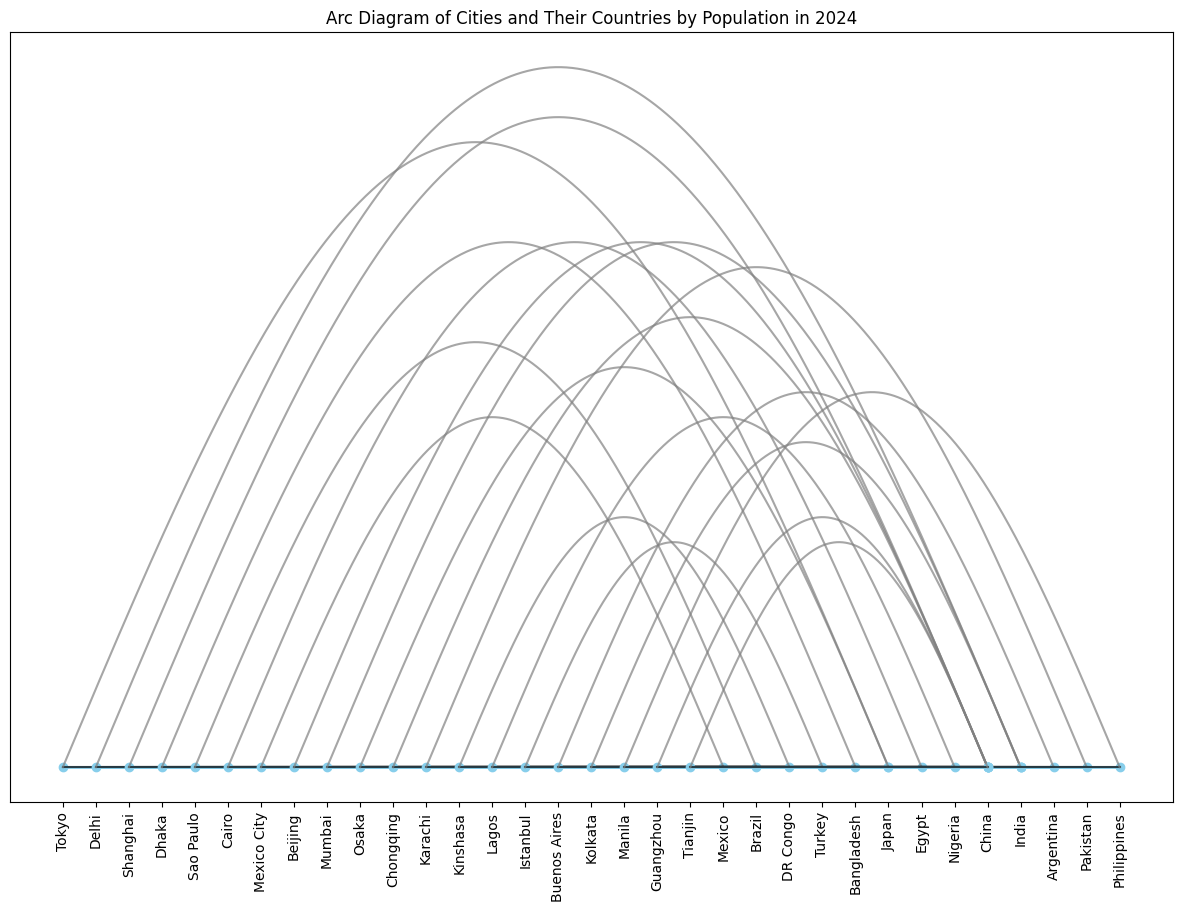

In [10]:
import matplotlib.pyplot as plt
import numpy as np

top_20_cities = df.sort_values(by='Population (2024)', ascending=False).head(20)
cities = top_20_cities['City'].tolist()
countries = top_20_cities['Country'].tolist()

nodes = cities + list(set(countries))
nodes_positions = {node: i for i, node in enumerate(nodes)}

edges = [(row['City'], row['Country']) for _, row in top_20_cities.iterrows()]

plt.figure(figsize=(15, 10))
for start, end in edges:
    start_pos = nodes_positions[start]
    end_pos = nodes_positions[end]
    plt.plot([start_pos, end_pos], [0, 0], 'ro-', lw=2, markersize=6, color='skyblue')
    plt.plot([start_pos, end_pos], [0, 0], 'k', alpha=0.7)
    arc_height = abs(end_pos - start_pos) / 2
    x = np.linspace(start_pos, end_pos, 500)
    y = np.sin((x - start_pos) / (end_pos - start_pos) * np.pi) * arc_height
    plt.plot(x, y, color='gray', alpha=0.7)

plt.xticks(range(len(nodes)), nodes, rotation=90)
plt.yticks([])
plt.title('Arc Diagram of Cities and Their Countries by Population in 2024')
plt.show()